<a href="https://colab.research.google.com/github/Omkar-K01/TY_CFD/blob/main/CFD_FVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

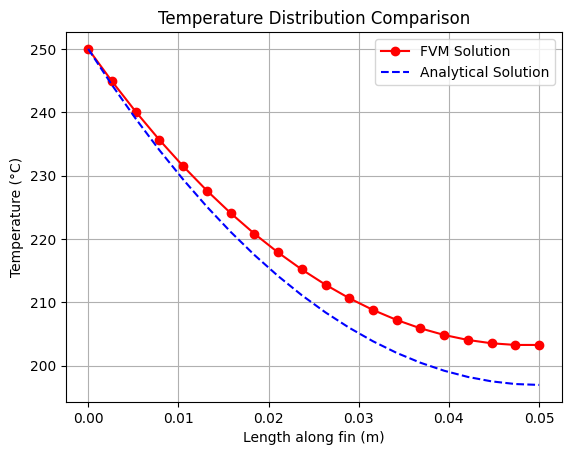

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Geometrical and thermal properties
L = 0.05           # Length (m)
D = 0.012          # Diameter (m)
k = 109            # Thermal conductivity of brass (W/m°C)
h = 80             # Convective heat transfer coefficient (W/m²°C)
T_base = 250       # Base temperature (°C)
T_inf = 32         # Ambient temperature (°C)

A = np.pi * D**2 / 4      # Cross-sectional area
P = np.pi * D             # Perimeter
n = 20                    # Number of control volumes
dx = L / n                # Control volume width

# Coefficients
aW = k * A / dx
aE = k * A / dx
aP = aW + aE + h * P * dx
Su = h * P * dx * T_inf

# Initialize coefficient matrix and source vector
A_matrix = np.zeros((n, n))
b_vector = np.zeros(n)

# Fill interior nodes
for i in range(1, n-1):
    A_matrix[i, i-1] = -aW
    A_matrix[i, i] = aP
    A_matrix[i, i+1] = -aE
    b_vector[i] = Su

# Boundary node at base (Dirichlet)
A_matrix[0, 0] = 1
b_vector[0] = T_base

# Boundary node at tip (Neumann, insulated)
A_matrix[-1, -2] = -1
A_matrix[-1, -1] = 1
b_vector[-1] = 0

# Solve the linear system
T = np.linalg.solve(A_matrix, b_vector)

# Analytical solution
m = np.sqrt(h * P / (k * A))
theta = np.cosh(m * (L - x)) / np.cosh(m * L)
T_analytical = T_inf + theta * (T_base - T_inf)

# Plot both
plt.plot(x, T, 'ro-', label='FVM Solution')
plt.plot(x, T_analytical, 'b--', label='Analytical Solution')
plt.xlabel('Length along fin (m)')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Distribution Comparison')
plt.grid(True)
plt.legend()
plt.show()

